In [1]:
#Loading dataset
#Import pandas library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Reading the data
mydata = pd.read_csv("D:\\downloads d drive\\PrcTraining.csv", low_memory=False)

In [2]:
mydata.describe()

,PlantC,VendorCodeC,Tracking
count,65672.000000,65672.000000,64736.000000
mean,23.350058,713190.503990,2.873656
std,4.729042,21299.933895,1.815800
min,20.000000,700009.000000,1.000000
25%,22.000000,705880.000000,1.000000
50%,23.000000,709656.000000,4.000000
75%,24.000000,718233.000000,4.000000
max,61.000000,906377.000000,9.000000


In [3]:
newdata = mydata.drop(['Document_Date', 'MaterialC', 'PlantC', 'Order_Unit', 'Delivery_date', 'Still_to_be_delivered_qty', 'Price_unit', 'Net_price', 'Net_Order_Value', 'Tracking'], axis = 1)

In [4]:
newdata

,MatGR,VendorCodeC,Order_Quantity,Completed_days
0,8325,701185,40,45
1,8325,701185,40,45
2,8325,701185,50,45
3,8325,701185,50,45
4,8325,701185,50,45
...,...,...,...,...
65667,8407,905637,300,193
65668,8406,905637,6,193
65669,8401,717123,88,109
65670,8401,717123,8,109


In [5]:
newdata.isnull().sum()

MatGR             0
VendorCodeC       0
Order_Quantity    0
Completed_days    0
dtype: int64

In [6]:
newdata.isnull().any()

MatGR             False
VendorCodeC       False
Order_Quantity    False
Completed_days    False
dtype: bool

In [7]:
import seaborn as sns
import os

<Axes: >

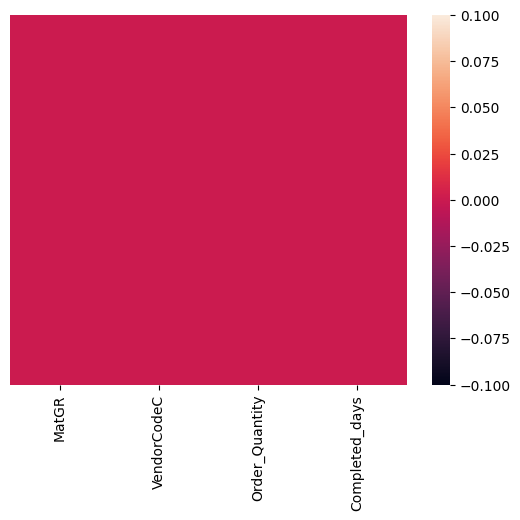

In [8]:
sns.heatmap(newdata.isnull(), yticklabels = False)

In [9]:
#Finding and replacing missing values
missing_values = ["#VALUE!", "#NUM!"]
newdata = pd.read_csv("D:\\downloads d drive\\PrcTraining.csv", low_memory=False, na_values = missing_values)

In [10]:
newdata.isnull().sum()

Document_Date                  0
MatGR                         55
MaterialC                    819
PlantC                         0
VendorCodeC                    0
Order_Unit                     0
Order_Quantity                 0
Delivery_date                  0
Still_to_be_delivered_qty      0
Price_unit                     0
Net_price                      0
Net_Order_Value                0
Tracking                     936
Completed_days                 6
dtype: int64

<Axes: >

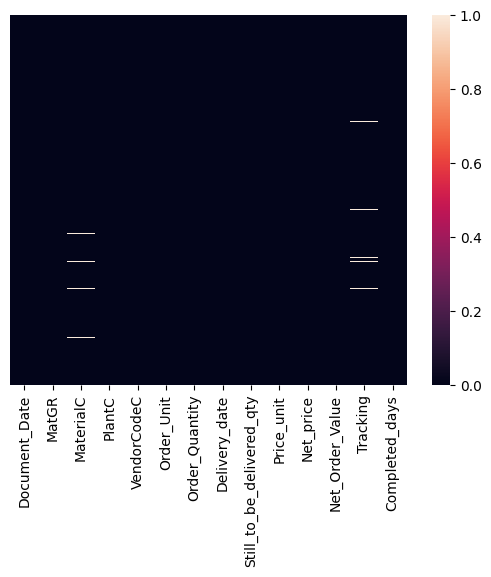

In [11]:
sns.heatmap(newdata.isnull(), yticklabels = False)

In [12]:
#Remove these #VALUE! value
newdata

,Document_Date,MatGR,MaterialC,PlantC,VendorCodeC,Order_Unit,Order_Quantity,Delivery_date,Still_to_be_delivered_qty,Price_unit,Net_price,Net_Order_Value,Tracking,Completed_days
0,1/1/2019,8325.0,1.896020e+10,24,701185,EA,40,2/15/2019,0,1,"17,320.00","692,800.00",4.0,45.0
1,1/1/2019,8325.0,1.896024e+10,24,701185,EA,40,2/15/2019,0,1,"11,678.04","467,121.60",4.0,45.0
2,1/1/2019,8325.0,1.896020e+10,24,701185,EA,50,2/15/2019,0,1,"2,150.00","107,500.00",4.0,45.0
3,1/1/2019,8325.0,1.896020e+10,24,701185,EA,50,2/15/2019,0,1,"1,675.00","83,750.00",4.0,45.0
4,1/1/2019,8325.0,1.896020e+10,24,701185,EA,50,2/15/2019,0,1,"1,675.00","83,750.00",4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65667,8/22/2022,8407.0,1.644004e+10,21,905637,M,300,3/3/2023,0,1,152.00,"45,600.00",1.0,193.0
65668,8/22/2022,8406.0,1.644020e+10,21,905637,EA,6,3/3/2023,0,1,"4,545.00","27,270.00",1.0,193.0
65669,12/5/2022,8401.0,2.020213e+09,21,717123,EA,88,3/24/2023,0,1,"1,249.15","109,925.20",1.0,109.0
65670,12/5/2022,8401.0,2.020214e+09,21,717123,EA,8,3/24/2023,0,1,"1,249.15","9,993.20",1.0,109.0


In [13]:
data1 = newdata.dropna()
data1

,Document_Date,MatGR,MaterialC,PlantC,VendorCodeC,Order_Unit,Order_Quantity,Delivery_date,Still_to_be_delivered_qty,Price_unit,Net_price,Net_Order_Value,Tracking,Completed_days
0,1/1/2019,8325.0,1.896020e+10,24,701185,EA,40,2/15/2019,0,1,"17,320.00","692,800.00",4.0,45.0
1,1/1/2019,8325.0,1.896024e+10,24,701185,EA,40,2/15/2019,0,1,"11,678.04","467,121.60",4.0,45.0
2,1/1/2019,8325.0,1.896020e+10,24,701185,EA,50,2/15/2019,0,1,"2,150.00","107,500.00",4.0,45.0
3,1/1/2019,8325.0,1.896020e+10,24,701185,EA,50,2/15/2019,0,1,"1,675.00","83,750.00",4.0,45.0
4,1/1/2019,8325.0,1.896020e+10,24,701185,EA,50,2/15/2019,0,1,"1,675.00","83,750.00",4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65667,8/22/2022,8407.0,1.644004e+10,21,905637,M,300,3/3/2023,0,1,152.00,"45,600.00",1.0,193.0
65668,8/22/2022,8406.0,1.644020e+10,21,905637,EA,6,3/3/2023,0,1,"4,545.00","27,270.00",1.0,193.0
65669,12/5/2022,8401.0,2.020213e+09,21,717123,EA,88,3/24/2023,0,1,"1,249.15","109,925.20",1.0,109.0
65670,12/5/2022,8401.0,2.020214e+09,21,717123,EA,8,3/24/2023,0,1,"1,249.15","9,993.20",1.0,109.0


In [14]:
data2 = data1.drop(['Document_Date', 'MaterialC', 'Order_Unit', 'Delivery_date', 'Still_to_be_delivered_qty', 'Price_unit', 'Net_price', 'Net_Order_Value', 'Tracking'], axis = 1)

In [15]:
data2

,MatGR,PlantC,VendorCodeC,Order_Quantity,Completed_days
0,8325.0,24,701185,40,45.0
1,8325.0,24,701185,40,45.0
2,8325.0,24,701185,50,45.0
3,8325.0,24,701185,50,45.0
4,8325.0,24,701185,50,45.0
...,...,...,...,...,...
65667,8407.0,21,905637,300,193.0
65668,8406.0,21,905637,6,193.0
65669,8401.0,21,717123,88,109.0
65670,8401.0,21,717123,8,109.0


In [16]:
data2 = data2.replace(',','', regex = True)
data2

,MatGR,PlantC,VendorCodeC,Order_Quantity,Completed_days
0,8325.0,24,701185,40,45.0
1,8325.0,24,701185,40,45.0
2,8325.0,24,701185,50,45.0
3,8325.0,24,701185,50,45.0
4,8325.0,24,701185,50,45.0
...,...,...,...,...,...
65667,8407.0,21,905637,300,193.0
65668,8406.0,21,905637,6,193.0
65669,8401.0,21,717123,88,109.0
65670,8401.0,21,717123,8,109.0


In [17]:
data3 = data2.drop(['VendorCodeC'], axis = 1)
data3

,MatGR,PlantC,Order_Quantity,Completed_days
0,8325.0,24,40,45.0
1,8325.0,24,40,45.0
2,8325.0,24,50,45.0
3,8325.0,24,50,45.0
4,8325.0,24,50,45.0
...,...,...,...,...
65667,8407.0,21,300,193.0
65668,8406.0,21,6,193.0
65669,8401.0,21,88,109.0
65670,8401.0,21,8,109.0


In [18]:
# Providing the input and output data
# Import Numpy Library
import numpy as np

In [19]:
y = data3['Completed_days'].values
y

array([ 45.,  45.,  45., ..., 109., 109., 154.])

In [20]:
X = data3.drop('Completed_days', axis = 1).values
X

array([[8325.0, 24, '40'],
       [8325.0, 24, '40'],
       [8325.0, 24, '50'],
       ...,
       [8401.0, 21, '88'],
       [8401.0, 21, '8'],
       [9204.0, 21, '1']], dtype=object)

In [21]:
#X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#X

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 100)

In [23]:
X_train

array([[8401.0, 24, '2'],
       [8311.0, 22, '68'],
       [8406.0, 22, '1000'],
       ...,
       [8401.0, 23, '48'],
       [8401.0, 22, '2'],
       [8308.0, 22, '50.000']], dtype=object)

In [24]:
X_test

array([[8401.0, 24, '1'],
       [8801.0, 24, '10'],
       [8406.0, 23, '200'],
       ...,
       [8406.0, 24, '50'],
       [8401.0, 22, '25'],
       [9204.0, 23, '3']], dtype=object)

In [25]:
y_train

array([161.,  60., 180., ..., 185., 171., 162.])

In [26]:
y_test

array([189.,  92.,  75., ...,  60.,  78., 194.])

In [27]:
#Model Building
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = True)
data3_lr = lr.fit(X_train, y_train)

In [28]:
data3_lr

LinearRegression()

In [29]:
data3_lr.fit(X_train, y_train)

LinearRegression()

In [30]:
prediction = data3_lr.predict(X)

In [31]:
prediction

array([116.83783689, 116.83783689, 116.84161635, ..., 122.4384563 ,
       122.40822062, 139.5677223 ])

In [32]:
import pickle

In [33]:
with open('lr_pickle', 'wb') as f:
    pickle.dump(lr, f)

In [34]:
with open('lr_pickle', 'rb') as f:
    mp = pickle.load(f)

In [35]:
import joblib

In [36]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('lr_pickle')

# Create a DataFrame for the input data    8325.0	24	701185	40   MatGR	PlantC	VendorCodeC	Order_Quantity	 8407.0	21	905637	300	
input_data = pd.DataFrame({
    'MatGR': [8325.0],
    'PlantC': [24],
    #'VendorCodeC': [701185],
    'Order_Quantity': [40],
    # Add more columns for each feature and provide corresponding values
})

# Make predictions
predictions = model.predict(input_data)

# Print the predictions
print(predictions)

[116.83783689]


D:\Python\Training\docutraining\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [37]:
# Make predictions for delivery time
model = joblib.load('lr_pickle')
predicted_delivery_time = model.predict(X)

# Define the desired delivery time
desired_delivery_time = 116

# Find vendors with similar delivery times
similar_vendors = data2.loc[np.abs(predicted_delivery_time - desired_delivery_time) < 1].VendorCodeC.unique()

print("Vendors with similar delivery times:")
print(similar_vendors.tolist())

#np.set_printoptions(threshold=np.inf)  # Set the threshold to infinity
#print("Vendors with similar delivery times:")
#print(similar_vendors)

Vendors with similar delivery times:
[701185, 711444, 710589, 704151, 704930, 703844, 718433, 700358, 701766, 717945, 706145, 715537, 710694, 715373, 712782, 717017, 709372, 701731, 718878, 706887, 704889, 711478, 711275, 710867, 709069, 701174, 708586, 706244, 719883, 709857, 701851, 700308, 703789, 707896, 700053, 711188, 712922, 717209, 710229, 717092, 710802, 707850, 706301, 715733, 704671, 711221, 709664, 709102, 703195, 707779, 707661, 700228, 715763, 701906, 711719, 718562, 719399, 702023, 716439, 707371, 709656, 706252, 706285, 707666, 706271, 707796, 704931, 706159, 718284, 704373, 707572, 709773, 714227, 705362, 708529, 706574, 711261, 707023, 700031, 710845, 703301, 719487, 701767, 707167, 709268, 719837, 700047, 705325, 703532, 706266, 707948, 700370, 703523, 707990, 716720, 719143, 711893, 701739, 704316, 704087, 708616, 710262, 717715, 706255, 709122, 714995, 718685, 717939, 718574, 719536, 709609, 707380, 709234, 704392, 704789, 700985, 702070, 701215, 719475, 709488, 71

In [38]:
# Make predictions for delivery time
model1 = joblib.load('lr_pickle')
predicted_delivery_time = model1.predict(X)

# Define the new input data 8407.0	21	905637	300	
# Create a new data point for prediction
#new_data_point = np.array([[new_material_group, new_order_quantity, new_plant_name]])
new_data_point = pd.DataFrame({
    'MatGR': [8407.0],
    'PlantC': [24],
    #'VendorCodeC': [905637],
    'Order_Quantity': [300],
    # Add more columns for each feature and provide corresponding values
})


# Normalize the new data point
#new_data_point = (new_data_point - np.mean(X, axis=0)) / np.std(X, axis=0)

# Predict the delivery time for the new data point
predicted_delivery_time = model1.predict(new_data_point)

# Define the threshold for similar delivery times
desired_delivery_time = 100
threshold = 1

# Find vendors with similar delivery times
similar_vendors = data2.loc[np.abs(y - predicted_delivery_time) < threshold, 'VendorCodeC'].unique()

print("Vendors with similar delivery times:")
print(similar_vendors)

Vendors with similar delivery times:
[709130 711267 705654 701053 713632 716502 709591 704920 901345 709187
 718558 708616 717589 719554 718797 702269 708576 715940 707390 717209
 707251 720177 706241 708588 702085 703790 705359 706121 717914 800515
 700511 719652 717969 703507 709553 708563 707006 710293 705408 705233
 718589 719381 707661 709268 720569 717939 709137 707909 715857 701766
 712408 716334 711610 707572 707602 711237 718980 718614 707333 703519
 715471 700384 702070 712782 704767 704111 719069 703987 711444 704550
 704416 700101 721108 708528 704392 701778 705433 711408 720946 717827
 711965 720628 709113 719506 705914 706948 719289 718223 701142 709548
 709496 716090 720107 706546 717893 719904 719830 706083 705901 713636
 703228 714995 709234 718003 711502 700222 710846 710839 700118 710898
 715246 721450 718278 711694 721179 706187 718282 717025 703181 709216
 705382 702535 709616 719399 718030 701309 708245 716408 700111 703301
 721602 708377 718459 713767 709822 7002

D:\Python\Training\docutraining\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [39]:
# Make predictions for delivery time
model2 = joblib.load('lr_pickle')
predicted_delivery_time = model2.predict(X)

# Define the new input data 8407.0	21	905637	300	
# Create a new data point for prediction
#new_data_point = np.array([[new_material_group, new_order_quantity, new_plant_name]])

new_material_group = int(8325.0)
new_order_quantity = 40
new_plant_name = 24
#new_vendor = 905637

new_data_point = np.array([[new_material_group, new_order_quantity, new_plant_name]])

# Normalize the new data point
#new_data_point = (new_data_point - np.mean(X, axis=0)) / np.std(X, axis=0)

# Predict the delivery time for the new data point
predicted_delivery_time = model2.predict(new_data_point)

# Define the threshold for similar delivery times
desired_delivery_time = 119
threshold = 1

# Find vendors with similar delivery times
similar_vendors = data2.loc[np.abs(y - predicted_delivery_time) < threshold, 'VendorCodeC'].unique()

print("Vendors with similar delivery times:")
print(similar_vendors)

Vendors with similar delivery times:
[711221 708375 717459 709720 719934 703676 713636 710882 706244 701105
 707889 904307 711019 719325 706130 704920 719712 719381 716592 716077
 708616 707380 700209 704221 701215 714995 707948 707796 715207 705362
 702307 717382 719388 702558 703960 704903 704317 718280 709778 703573
 715884 701766 708398 718346 718709 709234 703958 710729 713260 711537
 716112 710445 712727 719172 719151 711220 704882 703102 712782 715452
 717195 716720 717742 710969 702510 710739 706266 703973 703301 708377
 701851 711498 704432 718558 704048 720424 703461 717914 706565 709823
 709553 718739 711405 714691 709174 707218 709137 719448 709647 718593
 716502 700511 709548 706008 715239 710714 704111 708940 716897 700100
 702727 717648 700431 704769 712386 719281 703519 704833 702493 716234
 704355 720710 707390 707597 708529 711251 719603 708135 706575 700047
 705905 705904 700214 720107 703504 717045 709268 720934 719950 709939
 721042 721041 721039 721040 721047 7210

In [40]:
data3_lr.intercept_

-29.438330947865808

In [41]:
data3_lr.coef_

array([ 2.13725371e-02, -1.31938839e+00,  3.77946029e-04])

In [42]:
#Applying the model to make a prediction
#Import functions from the sklearn.metrics sub-module to compute the performance metrics
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test) 

In [43]:
vector = np.vectorize(np.int_)
y_lr_test_pred = vector(y_lr_test_pred)
print(y_lr_test_pred)

[118 126 119 ... 118 121 136]


In [44]:
vector = np.vectorize(np.int_)
y_lr_train_pred = vector(y_lr_train_pred)
print(y_lr_train_pred)

[118 119 121 ... 119 121 119]


In [45]:
#Evaluate model performance
y_train

array([161.,  60., 180., ..., 185., 171., 162.])

In [46]:
y_lr_train_pred

array([118, 119, 121, ..., 119, 121, 119])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [48]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  4552.972061108234
LR R2 (Train):  0.015781786722879332
LR MSE (Test):  4329.866630417897
LR R2 (Test):  0.013472162250764308


In [49]:
np.sqrt(mean_squared_error(y_train,y_lr_train_pred)) 

67.4757146024274

In [50]:
np.sqrt(mean_squared_error(y_test,y_lr_test_pred))

65.80172209310253

In [51]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [52]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,4552.972061,0.015782,4329.86663,0.013472


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16528\2532225999.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()], 'k--', c = 'blue', lw = 3)


Text(0, 0.5, 'Predicted')

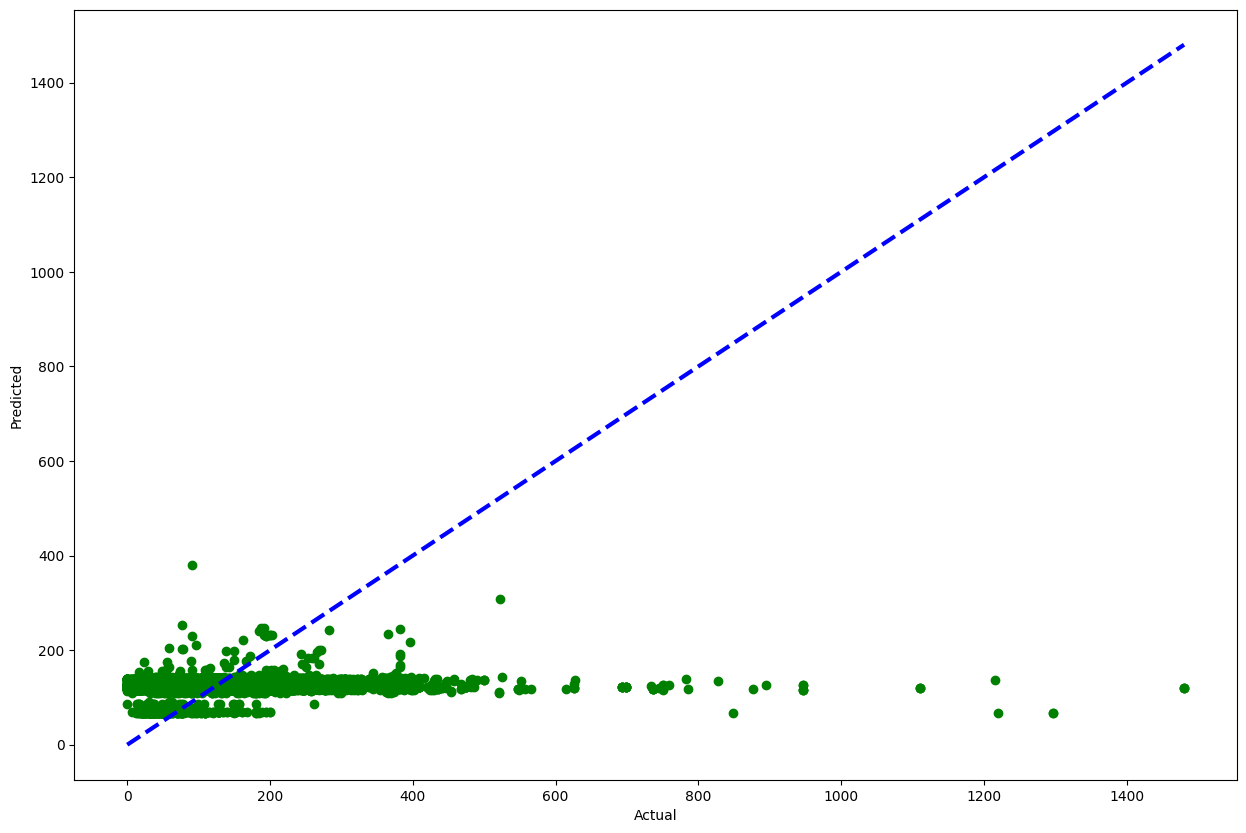

In [53]:
#Scatter plot for train data
plt.figure(figsize = (15,10))
plt.scatter(y_train,y_lr_train_pred, c = 'green')
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()], 'k--', c = 'blue', lw = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [54]:
#Import metrics library
from sklearn import metrics

# Print result of MAE
print(metrics.mean_absolute_error(y_test, y_lr_test_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_lr_test_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_lr_test_pred)))

48.44275283517166
4329.866630417897
65.80172209310253


In [55]:
lr.predict(X_test)

array([118.44740981, 126.99982617, 119.94887215, ..., 118.57279185,
       121.0952573 , 136.9297014 ])

In [56]:
np.array([y_test])

array([[189.,  92.,  75., ...,  60.,  78., 194.]])

In [57]:
lr.score(X_test, y_test)

0.012923066643782621

In [58]:
#Random Forest Model
#Training the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [59]:
#Applying the model to make a prediction
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [60]:
vector = np.vectorize(np.int_)
y_rf_test_pred = vector(y_rf_test_pred)
print(y_rf_test_pred)

[123 123 123 ... 123 123 170]


In [61]:
vector = np.vectorize(np.int_)
y_rf_train_pred = vector(y_rf_train_pred)
print(y_rf_train_pred)

[123  97 123 ... 123 123  97]


In [62]:
y_rf_train_pred

array([123,  97, 123, ..., 123, 123,  97])

In [63]:
#Evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [64]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,4410.801631,0.046515,4183.643196,0.046788


In [65]:
np.sqrt(mean_squared_error(y_train,y_rf_train_pred)) 

66.41386625757553

In [66]:
np.sqrt(mean_squared_error(y_test,y_rf_test_pred)) 

64.68108839211047

In [67]:
#Model Comparision
data2_models = pd.concat([lr_results, rf_results], axis = 0)
data2_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,4552.972061,0.015782,4329.86663,0.013472
0,Random Forest,4410.801631,0.046515,4183.643196,0.046788


In [68]:
data2_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,4552.972061,0.015782,4329.86663,0.013472
1,Random Forest,4410.801631,0.046515,4183.643196,0.046788


Text(0.5, 0, 'Experimental Completed_days')

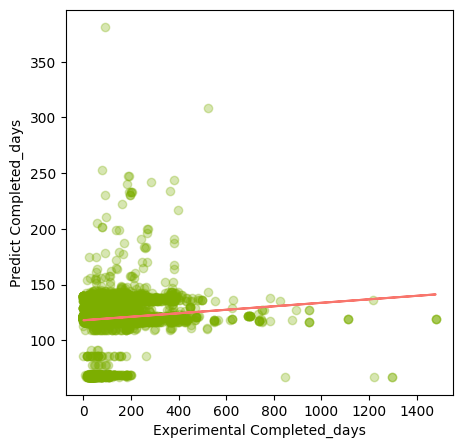

In [69]:
#Data visualization of prediction results
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5, 5))
plt.scatter(x = y_train, y = y_lr_train_pred, c = "#7CAE00", alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Completed_days')
plt.xlabel('Experimental Completed_days')